In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import os
import xgboost as xgb
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, f1_score,roc_auc_score, precision_score, recall_score
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier


### Import the above libraries Using pip install command on your terminal 
### Plese Ensure that you have downloaded python version 3.10
For more about github Visit Click [HERE](https://www.freecodecamp.org/news/introduction-to-git-and-github/)
you don't need to memories the commands 

you just need to [install Visual studion](https://code.visualstudio.com/download) code and download these extension from inside Visual studion code

Extension 1: Git Graph
Extension 2: GitLens

or you can down loada GIT Kraken If you are planning to use another [editor](https://www.gitkraken.com/download)
[Kiggle Dataset](https://www.gitkraken.com/download)

### Discovering different aspects of the Data set

In [4]:
os.rename("Data/PS_20174392719_1491204439457_log.csv","Data/Online_Fraud.csv") #renaming the file from kiggle

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Data/PS_20174392719_1491204439457_log.csv' -> 'Data/Online_Fraud.csv'

In [5]:
DB_Original = pd.read_csv("Data/Online_Fraud.csv") #read the data srt and save it to a var

In [2]:
DB_Original.head(10) # first 10 rows


NameError: name 'DB_Original' is not defined

In [29]:
DB_Original.tail(10) # last 10 rows

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362610,742,4,63416.99,63416.99,0.0,0.00,0.00,1
6362611,742,1,63416.99,63416.99,0.0,276433.18,339850.17,1
6362612,743,4,1258818.82,1258818.82,0.0,0.00,0.00,1
6362613,743,1,1258818.82,1258818.82,0.0,503464.50,1762283.33,1
6362614,743,4,339682.13,339682.13,0.0,0.00,0.00,1
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.0,0.00,0.00,1
6362619,743,1,850002.52,850002.52,0.0,6510099.11,7360101.63,1


In [6]:
DB_Original.shape # how many rows asd columns // Large number of rows can increase the performance of the model :)

(6362620, 11)

In [25]:
DB_Original.info() # what are the types of columns // object need to be redesigned or deleted  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrig  float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


In [7]:
DB_Original.describe() # this will give general statistics

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [89]:
DB_Original.isnull().sum() # we have no null valuse so no need for imputations 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
DB_Original.duplicated().sum() # no dublicates so no need for deleting dublicate function

0

In [10]:
DB_Original.type.value_counts() # what are the the valuse redundency in column type



type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

# Visualization

In [61]:
# colors for the uniform the look
Green = '#3ed33e'
Red = '#ff0000'

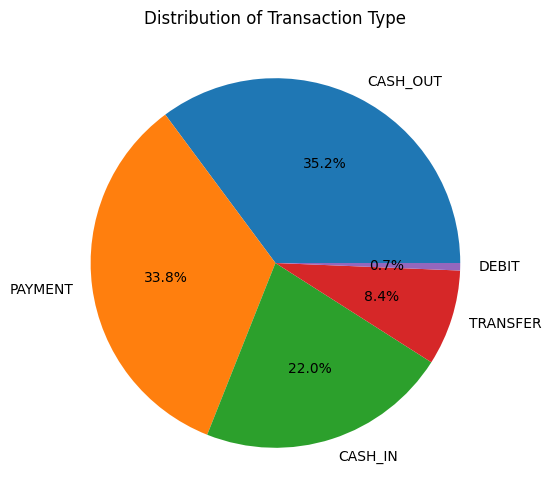

In [9]:
#This will help us determine which type are we mostly dealing with
type = DB_Original["type"].value_counts() # same as above
transactions = type.index # store keys of type
quantity = type.values # store values of type

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(quantity, labels = transactions, autopct='%1.1f%%')
plt.title("Distribution of Transaction Type")
plt.show()

<Axes: >

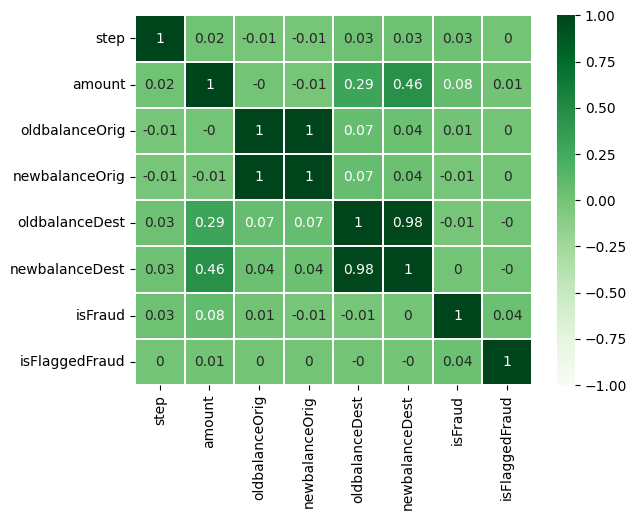

In [35]:
# we foucus on the is fraud column to choose wich would be used as feature 
correlation = DB_Original.corr(numeric_only = True)
sns.heatmap(correlation.round(2), annot=True,  cmap = 'Greens', vmin = -1, vmax = 1, linewidths=0.1)

<Axes: title={'center': 'Fraud vs non Fraud'}, xlabel='isFraud'>

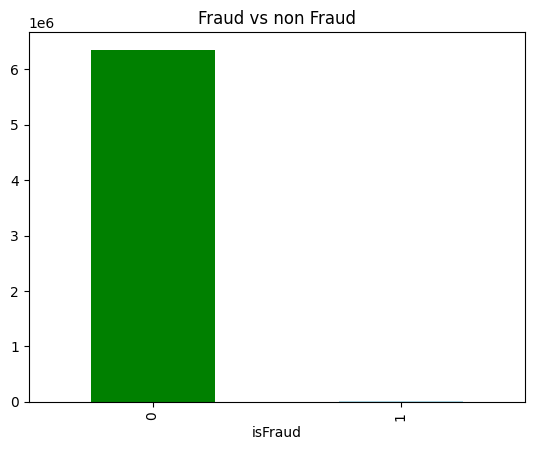

In [48]:
DB_Original.isFraud.value_counts().plot(title="Fraud vs non Fraud",kind="bar", color=["Green", "lightblue"])
#To visualize the rasio


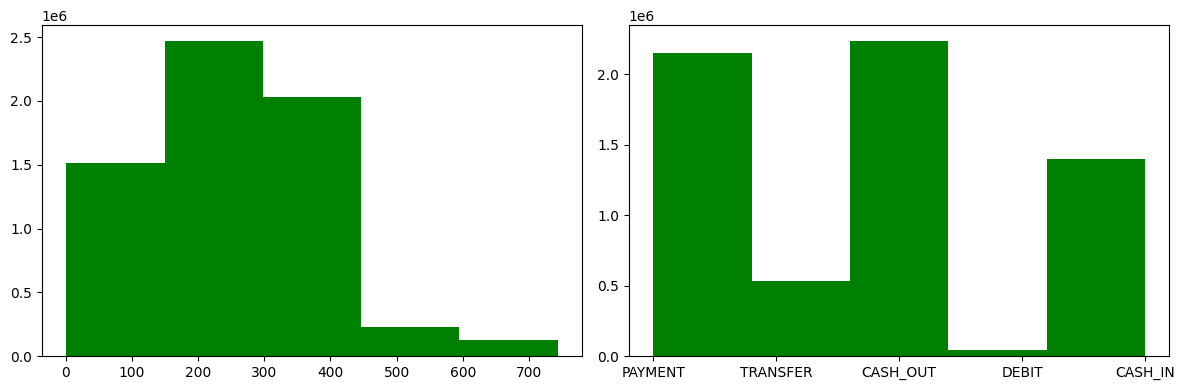

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the number of subplots and figure size as needed
axs[0].hist(DB_Original['step'], bins=5,color = "Green")
axs[1].hist(DB_Original['type'], bins=5,color = "Green")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

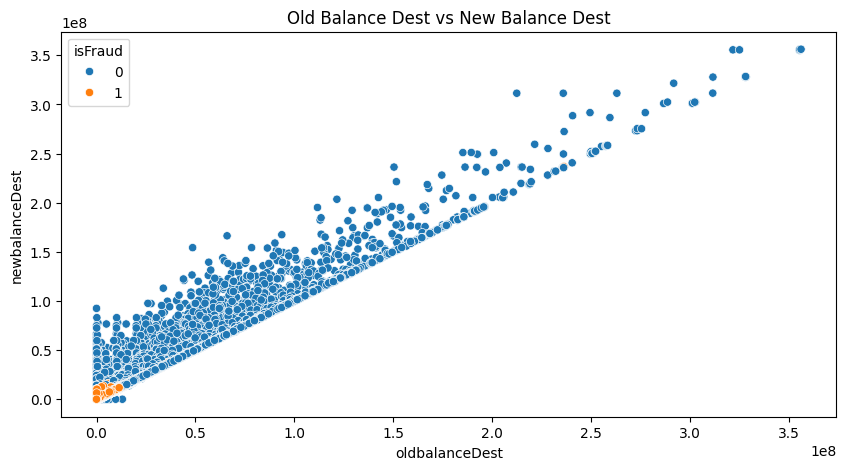

In [55]:
#Visualizing the relationship between 'oldbalanceDest' and 'newbalanceDest'
# we notice that most fraud users have 0 money as old balance wich make sense and new balance
# in a non fraud situation the old and new balance increace proportionally 
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=DB_Original)
plt.title('Old Balance Dest vs New Balance Dest')
plt.show()

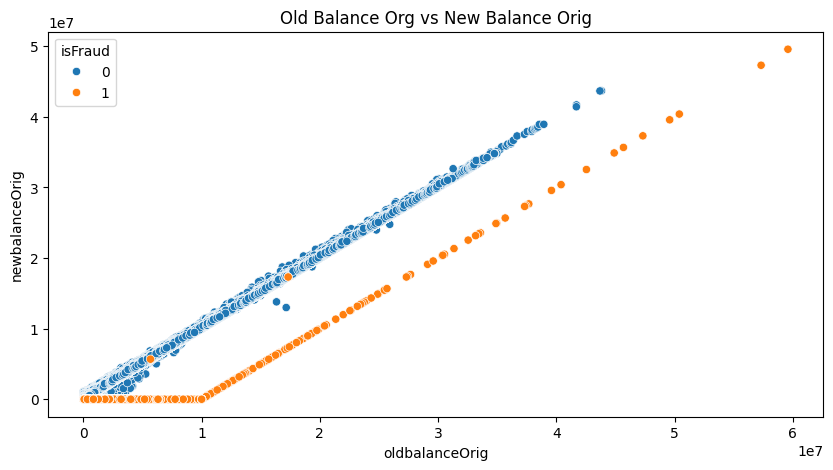

In [66]:
#Visualizing the relationship between 'oldbalanceOrig' and 'newbalanceOrig'
# in a case of fraud the new balance drops by lage margine wich make it shife to the right 
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceOrig', y='newbalanceOrig', hue='isFraud', data=DB_Original)
plt.title('Old Balance Org vs New Balance Orig')
plt.show()

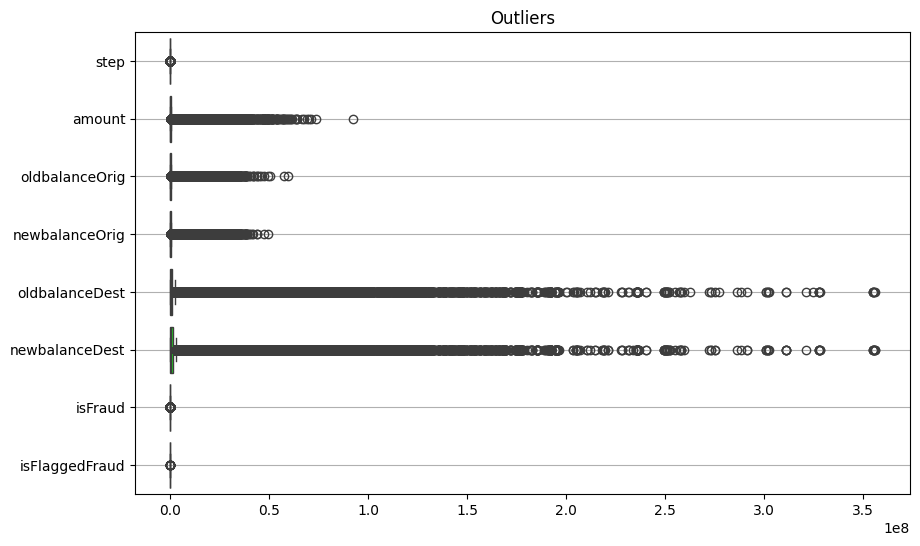

In [56]:
# used to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=DB_Original, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


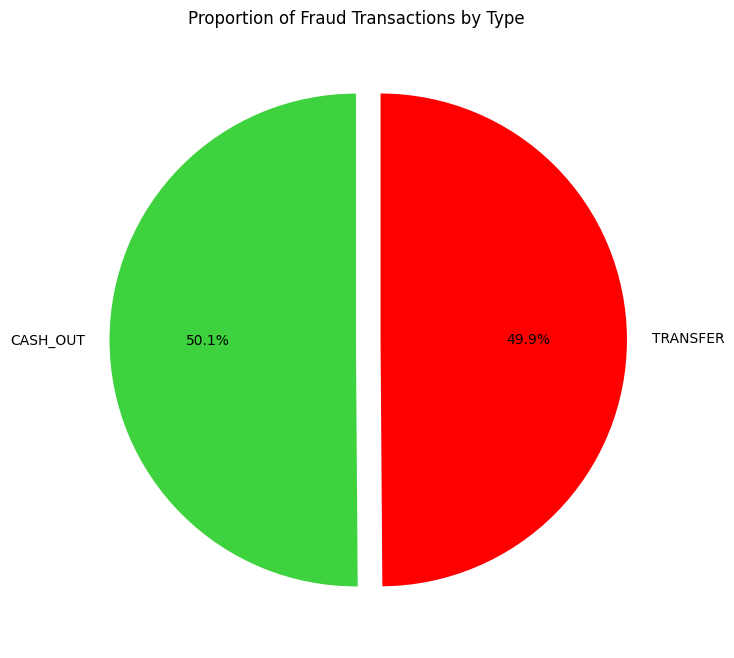

In [71]:
# there is no fraud in 'CASH_IN', 'DEBIT', 'PAYMENT' so they can be dropped 
fraud_transactions = DB_Original[DB_Original["isFraud"] == 1] # save draud rows in a new DF
fraud_counts_by_type = fraud_transactions.groupby("type").size() # divide then based on type then calculate the number of accurance
print(fraud_counts_by_type)

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_by_type, labels=fraud_counts_by_type.index, autopct='%1.1f%%', startangle=90, colors=[Green, Red], explode=(0, 0.1))
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

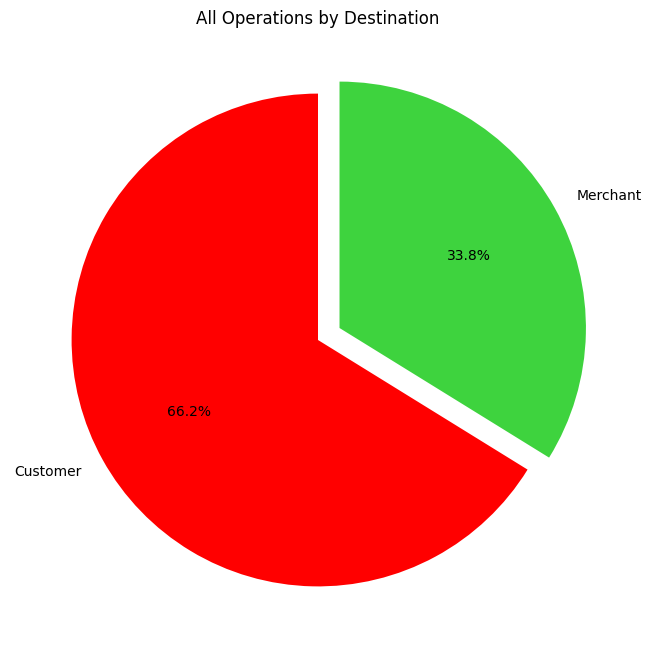

In [98]:
# Exploare the customer 
DB_Original_copy = DB_Original.copy()
DB_Original_copy['nameDest_first_letter'] = DB_Original_copy['nameDest'].str[0]
DB_Original_copy['nameDest_first_letter'] = DB_Original_copy['nameDest_first_letter'].replace('C', 'Customer')
DB_Original_copy['nameDest_first_letter'] = DB_Original_copy['nameDest_first_letter'].replace('M', 'Merchant')
all_by_dest = DB_Original_copy.groupby('nameDest_first_letter').size()

plt.figure(figsize=(8, 8))
plt.pie(all_by_dest, labels=all_by_dest.index, autopct='%1.1f%%', startangle=90, colors=[Red, Green], explode=(0, 0.1))
plt.title('All Operations by Destination')
plt.show()

In [27]:
DB_Original_copy.head(10)

NameError: name 'DB_Original_copy' is not defined

Text(0.5, 1.0, 'Fraud Transactions by Destination')

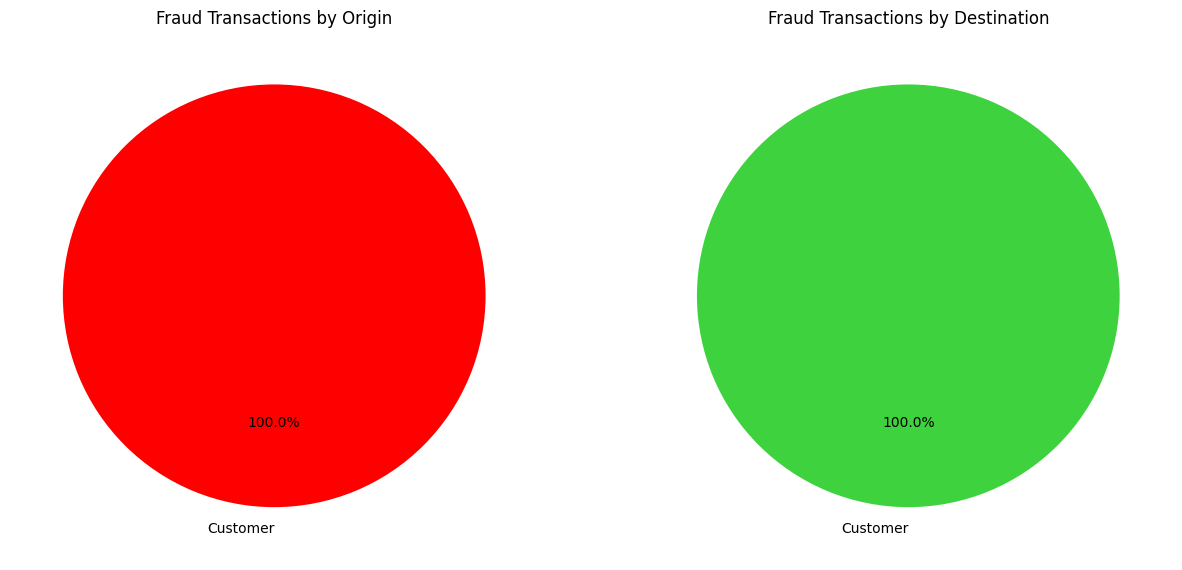

In [83]:
# if the transaction is a fraus it is indeed between two customers with no Merchant 
fraud_transactions = DB_Original[DB_Original['isFraud'] == 1].copy()
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrig'].str[0]
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest'].str[0]
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrg_first_letter'].replace('C', 'Customer')
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest_first_letter'].replace('C', 'Customer')
fraud_by_name_orig_first_letter = fraud_transactions.groupby('nameOrg_first_letter').size()
fraud_by_name_dest_first_letter = fraud_transactions.groupby('nameDest_first_letter').size()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].pie(fraud_by_name_orig_first_letter, labels=fraud_by_name_orig_first_letter.index, autopct='%1.1f%%', startangle=90, colors=[Red])
axes[0].set_title('Fraud Transactions by Origin')

axes[1].pie(fraud_by_name_dest_first_letter, labels=fraud_by_name_dest_first_letter.index, autopct='%1.1f%%', startangle=90, colors=[Green])
axes[1].set_title('Fraud Transactions by Destination')

In [9]:
fraud_transactions.head(10)


NameError: name 'fraud_transactions' is not defined

# Data processing


In [6]:
# Create a copy and drop isFlaggedFraud
F_List = ["step",'type',"amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","nameOrig","nameDest"]
DB_Pros = DB_Original[F_List].copy(deep=True)


In [7]:
# Not needed
DB_Pros["isFraud"] = DB_Pros["isFraud"].replace({1: "Fraud", 0:"Not Fraud"}) # to rename the values 

In [8]:
# Not needed
DB_Pros["isFraud"] = DB_Original["isFraud"].replace({"Fraud":1, "Not Fraud":0}) # to rename the values 

In [9]:
# Fix typo
DB_Pros = DB_Pros.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'}) 

In [10]:
# Exexlude Types That Never Have Fraud
types_to_exclude = ['CASH_IN', 'DEBIT', 'PAYMENT']
DB_Pros = DB_Pros[~DB_Pros['type'].isin(types_to_exclude)]

In [12]:
# to rename the values From Categorical to numerical
DB_Pros["type"] = DB_Pros["type"].replace({"CASH_OUT": 0, "TRANSFER":1}) 

In [13]:
# Drop Any Operation That is not from customer to Customer
DB_Pros['C2C'] = 0
DB_Pros.loc[(DB_Pros['nameDest'].str.startswith('C')) & (DB_Pros['nameDest'].str.startswith('C')), 'C2C'] = 1
DB_Pros = DB_Pros[DB_Pros['C2C'] == 1]


In [14]:
# drop unnecessary columns for the current analysis
DB_Pros=DB_Pros.drop(['nameOrig','nameDest','C2C'],axis=1) 

In [15]:
# Calculate the percentage and store it in a new column
DB_Pros['percentage_OLD'] = (DB_Pros['oldbalanceOrig'] - DB_Pros['newbalanceOrig']) / DB_Pros['oldbalanceOrig' ] * 100
DB_Pros['percentage_NEW'] = (DB_Pros['oldbalanceDest'] - DB_Pros['newbalanceDest']) / DB_Pros['oldbalanceDest' ] * 100
# Replace null values with zeros
DB_Pros = DB_Pros.replace([np.inf, -np.inf], np.nan)
DB_Pros.fillna(0, inplace=True)


In [16]:
X = DB_Pros[['step', 'type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','percentage_NEW','percentage_OLD']]
Y = DB_Pros['isFraud']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [14]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [17]:
DB_Pros.reset_index(drop=True, inplace=True)
DB_Pros.head(20)

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,percentage_OLD,percentage_NEW
0,1,1,181.00,181.00,0.00,0.00,0.00,1,100.000000,0.000000
1,1,0,181.00,181.00,0.00,21182.00,0.00,1,100.000000,100.000000
2,1,0,229133.94,15325.00,0.00,5083.00,51513.44,0,100.000000,-913.445603
3,1,1,215310.30,705.00,0.00,22425.00,0.00,0,100.000000,100.000000
4,1,1,311685.89,10835.00,0.00,6267.00,2719172.89,0,100.000000,-43288.748843
5,1,0,110414.71,26845.41,0.00,288800.00,2415.16,0,100.000000,99.163726
6,1,0,56953.90,1942.02,0.00,70253.00,64106.18,0,100.000000,8.749548
7,1,0,5346.89,0.00,0.00,652637.00,6453430.91,0,0.000000,-888.823942
8,1,0,23261.30,20411.53,0.00,25742.00,0.00,0,100.000000,100.000000
9,1,1,62610.80,79114.00,16503.20,517.00,8383.29,0,79.139975,-1521.526112


# ML model 

### SVM 

In [18]:
# Define the model
modelSVM = SVC(kernel='rbf',C=30)


In [19]:
# Train the model
modelSVM.fit(X_train_scaled, Y_train)


In [ ]:
# Make predictions
Y_pred_SVM = modelSVM.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_SVM = accuracy_score(Y_test, Y_pred_SVM)
print("Accuracy:", accuracy_SVM)

In [ ]:

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_SVM))
print("Classification Report:\n", classification_report(Y_test, Y_pred_SVM))


### FeedFowrward


In [37]:
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out


In [38]:
# Convert pandas DataFrame to numpy arrays
X_train_array = X_train.values
y_train_array = Y_train.values
X_test_array = X_test.values
y_test_array = Y_test.values

In [39]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_array, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_array, dtype=torch.float32)

In [40]:
# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [41]:

# Initialize the model, loss function, and optimizer
model = FFNN(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [42]:

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.1607
Epoch [20/100], Loss: 0.2954
Epoch [30/100], Loss: 0.2955
Epoch [40/100], Loss: 0.2955
Epoch [50/100], Loss: 0.2955
Epoch [60/100], Loss: 0.2955
Epoch [70/100], Loss: 0.2955
Epoch [80/100], Loss: 0.2955
Epoch [90/100], Loss: 0.2955
Epoch [100/100], Loss: 0.2955


In [43]:
# Evaluate the model
with torch.no_grad():
    model.eval()
    y_pred = model(X_test_tensor)
    y_pred = (y_pred > 0.5).float()
    accuracy = accuracy_score(y_test_tensor, y_pred)
    precision = precision_score(y_test_tensor, y_pred)
    recall = recall_score(y_test_tensor, y_pred)
    f1 = f1_score(y_test_tensor, y_pred)
    conf_matrix = confusion_matrix(y_test_tensor, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9970419540789991
Precision: 1.0
Recall: 0.002434570906877663
F1 Score: 0.004857316332726169
Confusion Matrix:
 [[552439      0]
 [  1639      4]]


### Decision Tree Classifier

In [17]:
# Define the model
modelDTC = DecisionTreeClassifier()

In [18]:
# Train the model
modelDTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [26]:
# Make predictions
y_pred = modelDTC.predict(X_test)


In [20]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9992564277489614


In [21]:
# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Confusion Matrix:
 [[552243    196]
 [   216   1427]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.88      0.87      0.87      1643

    accuracy                           1.00    554082
   macro avg       0.94      0.93      0.94    554082
weighted avg       1.00      1.00      1.00    554082



### Xgboost

In [16]:
# Define the XGBoost model
modelXGB = xgb.XGBClassifier()

In [18]:
# Train the model
modelXGB.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# Make predictions on the test set
y_pred = modelXGB.predict(X_test)


In [21]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)


In [22]:

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.999483830913114
Precision: 0.9631399317406143
Recall: 0.8587948874010956
F1 Score: 0.907979407979408
Confusion Matrix:
 [[552385     54]
 [   232   1411]]


# TESTING


In [22]:
y_pred = modelDTC.predict(X_test)
predicted_probabilities = modelDTC.predict_proba(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print(classification_report(Y_test, y_pred))
print(f'Matthews Correlation Coefficient: {accuracy:.2f}')
print(f'ROC-AUC Score: {roc_auc_score(Y_test, predicted_probabilities[:, 1]):.2f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.88      0.87      0.87      1643

    accuracy                           1.00    554082
   macro avg       0.94      0.93      0.94    554082
weighted avg       1.00      1.00      1.00    554082

Matthews Correlation Coefficient: 1.00
ROC-AUC Score: 0.93


In [37]:
def plot_confusion_matrix(modelDTC,X_test, Y_test, title):
    conf_matrix = confusion_matrix(X_test, Y_test)
    sns.heatmap( conf_matrix, display_labels=['Not Fraud', 'Fraud'], cmap=plt.cm.Blue)
   
    plt.title('Decision Tree Confusion Matrix')
    plt.show()
plot_confusion_matrix (modelDTC, X_test, Y_test, 'Decision Tree Confusion Matrix')  

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,percentage_NEW,percentage_OLD
5582560,393,0,226595.71,0.0,0.0,471074.03,697669.74,-48.101932,0.0
234002,14,0,32738.88,19861.0,0.0,2000052.46,1951865.63,2.409278,100.0
1385427,138,0,56175.00,21308.0,0.0,2307484.05,2912437.73,-26.217025,100.0
5655160,396,0,206512.50,0.0,0.0,886634.61,1093147.11,-23.291726,0.0
2068910,181,0,22577.24,0.0,0.0,1399894.48,1422471.72,-1.612782,0.0
...,...,...,...,...,...,...,...,...,...
2902133,228,0,134579.31,0.0,0.0,2330287.04,2464866.35,-5.775225,0.0
4002277,298,0,117877.94,30247.0,0.0,1586798.17,1704676.11,-7.428666,100.0
2635712,209,0,101370.76,0.0,0.0,5671473.91,5772844.67,-1.787379,0.0
2949531,230,0,308885.20,210.0,0.0,262430.37,571315.57,-117.701774,100.0


# SAVING 


In [ ]:
joblib.dump(model1DTC,"Fraud_detection_DTC.joblib") # save the model into a file [export]

NameError: name 'model1DTC' is not defined

In [ ]:
joblib.load("Fraud_detection_DTC.joblib") # read the model from a file [import]


In [ ]:
# export a tree
tree.export_graphviz(model1DTC,out_file='our_tree.dot',
                     feature_names=["step","type","amount","oldbalanceOrig","newbalanceOrig"],
                     class_names=sorted(DB_Pros['isFraud'].unique(),
                    label='all',
                    rounded= True,
                    Filled=True))